Using TensorFlow backend.









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.






Processing 1 images
image                    shape: (772, 826, 3)         min:   79.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


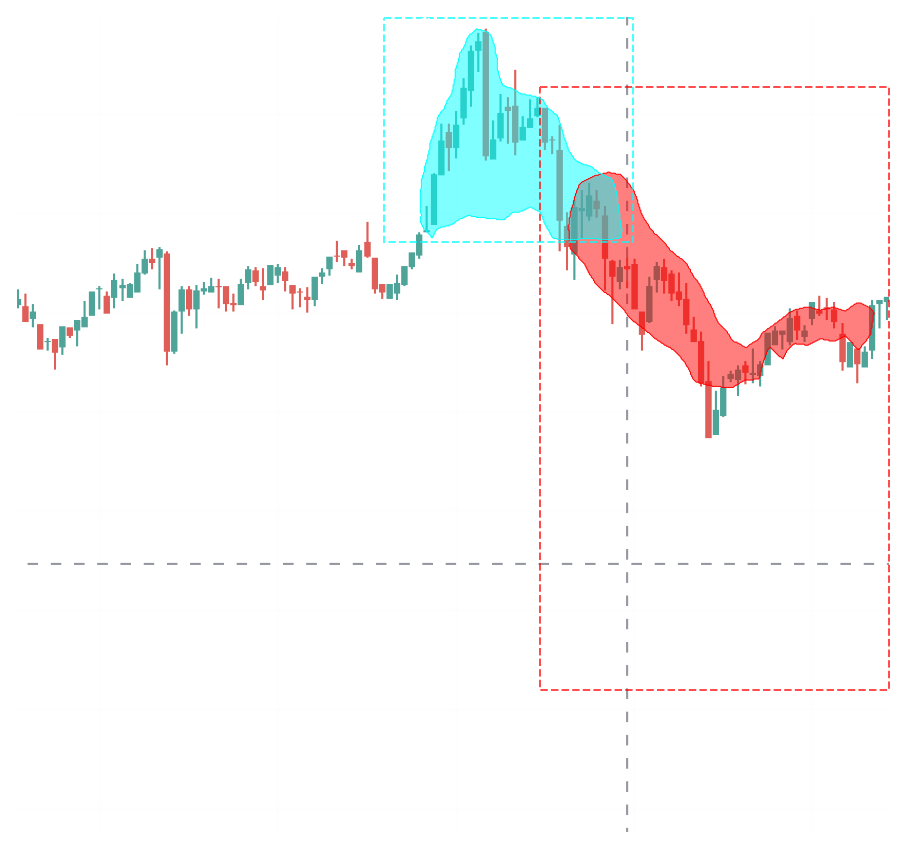

In [1]:
import sys
sys.path.append("Mask_RCNN-Multi-Class-Detection-master")
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from mrcnn import visualize
from mrcnn import utils
import warnings
from xml.etree import ElementTree
import skimage.draw
import cv2
import imgaug

# import keras libraries
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
warnings.filterwarnings("ignore")


class PredictionConfig(Config):
    NAME = "stock"
    NUM_CLASSES = 1 + 3
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
cfg = PredictionConfig()

model = MaskRCNN(mode='inference', model_dir='./', config=cfg)

model_path = 'stock20220527T1652/mask_rcnn_stock_0004.h5'
model.load_weights(model_path, by_name=True) 


image = load_img("images/val/Screenshot 2022-05-21 at 19.02.27.png")
image = img_to_array(image)

# call the detect method on image
results = model.detect([image], verbose=1)
r = results[0]
class_names=['background','c','ihs','hs']
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names,  r['scores'])


In [4]:
import numpy as np
mean = 0
var = 10
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, (224, 44)) 
gaussian.shape

(224, 44)